# Extraccion de datos de las pruebas de audicion.

Como primer paso instalamos las librerias necesarias para realizar el procesos ETL.

In [1]:
# Instalar paquetes necesarios (ejecutar solo la primera vez)
# test push
using Pkg
# Pkg.add(["DataFrames", "CSV", "Dates", "JSON3", "Logging", "Statistics"])

# Cargar librer√≠as
using DataFrames        # Manipulaci√≥n y an√°lisis de datos
using CSV              # Lectura y escritura de archivos CSV
using Dates            # Manejo de fechas y tiempos
using JSON3            # Manejo de datos JSON
using Logging          # Sistema de logs
using Statistics       # Funciones estad√≠sticas b√°sicas

# Configuraci√≥n de logging para monitorear el pipeline
logger = ConsoleLogger(stdout, Logging.Info)
global_logger(logger)

println("‚úÖ Librer√≠as cargadas exitosamente")

ArgumentError: ArgumentError: Package JSON3 not found in current path.
- Run `import Pkg; Pkg.add("JSON3")` to install the JSON3 package.

# Instalar paquetes necesarios (ejecutar solo la primera vez)
# Pkg.add(["DataFrames", "CSV", "Dates", "JSON3", "Logging", "Statistics"])

# Cargar librer√≠as


In [2]:
df = CSV.read("..\\data\\raw\\Paper1_WebData_Final.csv", DataFrame) 
println("‚úÖ Datos cargados exitosamente")

‚úÖ Datos cargados exitosamente


# 1. Extracci√≥n de datos
Como primer paso del proceso ETL (Extracci√≥n, Transformaci√≥n y Carga), se procede a extraer la informaci√≥n m√°s relevante desde nuestra base de datos. Esta etapa consiste en identificar y recuperar los datos necesarios que ser√°n utilizados en las siguientes fases del proceso, asegurando que se obtenga informaci√≥n precisa y √∫til para el an√°lisis posterior.

# Primer vistazo a los datos

Antes de realizar cualquier transformaci√≥n, es √∫til observar una muestra de los datos contenidos en la base de datos. Para ello, utilizamos la funci√≥n first, que nos permite visualizar las primeras filas del DataFrame y as√≠ tener una idea general de su contenido, estructura y posibles inconsistencias.

In [3]:
# Mostrar las primeras 20 filas del DataFrame
first(df, 20)

20√ó21 DataFrame
 Row ‚îÇ test_date    nid    L500k   L1k     L2k     L3k     L4k     L6k     L8k ‚ãØ
     ‚îÇ String15     Int64  Int64?  Int64?  Int64?  Int64?  Int64?  Int64?  Int ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ 12-FEB-2007      1      10       5       5      15       5       0      ‚ãØ
   2 ‚îÇ 29-FEB-2008      2      15       5      15      20      20      15
   3 ‚îÇ 08-FEB-2006      3      25      20      15      20      35      25
   4 ‚îÇ 29-FEB-2008      6      10      10      10      35      50      30
   5 ‚îÇ 08-FEB-2006      8      15      15       5      15      45      30      ‚ãØ
   6 ‚îÇ 29-FEB-2008      9      10       5       0       5      15      15
   7 ‚îÇ 29-FEB-2008     10       5       0       5       5       5      10
   8 ‚îÇ 29-FEB-2008     11      30      20      25      60      60      60
  ‚ãÆ  ‚îÇ      ‚ãÆ         ‚ãÆ      ‚ãÆ       ‚ãÆ       ‚ãÆ       ‚ãÆ       ‚ãÆ       ‚ãÆ       ‚ãÆ ‚ã±
  14 ‚îÇ 08-FEB-2006     18      10      10       5      35      40      35      ‚ãØ
  15 ‚îÇ 12-FEB-2007     20      15       5      10      50      50      15
  16 ‚îÇ 22-FEB-2006     21       5       0       5      20      10      25
  17 ‚îÇ 29-FEB-2008     22      15       5       5      15      15      40
  18 ‚îÇ 29-FEB-2008     23      10      10       5       5      20      20      ‚ãØ
  19 ‚îÇ 22-FEB-2006     24       5       0       0       0       5      10
  20 ‚îÇ 12-FEB-2007     26      15       5      15      25      35      20
                                                   13 columns and 5 rows omitted

# Columnas
Extraemos los nombres de las columnas de nuestra base de datos con el objetivo de identificarlas y comprender la estructura de la informaci√≥n disponible.

In [4]:
names(df)

21-element Vector{String}:
 "test_date"
 "nid"
 "L500k"
 "L1k"
 "L2k"
 "L3k"
 "L4k"
 "L6k"
 "L8k"
 "R500k"
 ‚ãÆ
 "R3k"
 "R4k"
 "R6k"
 "R8k"
 "gender"
 "naics"
 "age_group"
 "region"
 "NAICS_descr"

# Identificaci√≥n de datos faltantes

Utilizamos el siguiente c√≥digo para identificar valores vac√≠os o faltantes dentro de las columnas de nuestra base de datos. Este an√°lisis es fundamental para evaluar la calidad de los datos disponibles y tomar decisiones informadas sobre su limpieza o tratamiento en fases posteriores del proceso ETL.

In [5]:
using CSV, DataFrames, Plots

df = CSV.read("C:\\Users\\USUARIO\\ing_datos\\data\\raw\\Paper1_WebData_Final.csv", DataFrame) 


# Revisar valores faltantes
missing_report = DataFrame(
    columna = names(df),
    n_missing = [sum(ismissing.(df[!, c])) for c in names(df)]
)

missing_report

21√ó2 DataFrame
 Row ‚îÇ columna      n_missing 
     ‚îÇ String       Int64     
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ test_date            0
   2 ‚îÇ nid                  0
   3 ‚îÇ L500k               56
   4 ‚îÇ L1k                 66
   5 ‚îÇ L2k                 61
   6 ‚îÇ L3k                 61
   7 ‚îÇ L4k                 34
   8 ‚îÇ L6k                 77
  ‚ãÆ  ‚îÇ      ‚ãÆ           ‚ãÆ
  15 ‚îÇ R6k                 98
  16 ‚îÇ R8k               2307
  17 ‚îÇ gender            3244
  18 ‚îÇ naics                0
  19 ‚îÇ age_group            0
  20 ‚îÇ region           28056
  21 ‚îÇ NAICS_descr          0
                6 rows omitted

# Identificaci√≥n de tipos de datos y dimensiones de la base de datos

En esta etapa del proceso de extracci√≥n, utilizamos el siguiente c√≥digo para identificar el tipo de datos establecido en cada columna de la base de datos, lo cual nos permite comprender la naturaleza de la informaci√≥n (por ejemplo, num√©rica, texto, fecha, etc.) y aplicar transformaciones adecuadas en fases posteriores. Adem√°s, determinamos el n√∫mero total de columnas y filas presentes en la base de datos, lo que nos brinda una visi√≥n general de su tama√±o y estructura actual.

In [6]:

# Crear un DataFrame con los nombres de las columnas y sus tipos
tipos = DataFrame(
    Columna = names(df),
    Tipo = eltype.(eachcol(df))
)

# Mostrar la tabla
println(tipos)


# Numero de columnas y filas 
println("")
println("Numero de Filas y Columnas")
println(size(df))

21√ó2 DataFrame
 Row ‚îÇ Columna      Tipo                    
     ‚îÇ String       Type                    
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ test_date    String15
   2 ‚îÇ nid          Int64
   3 ‚îÇ L500k        Union{Missing, Int64}
   4 ‚îÇ L1k          Union{Missing, Int64}
   5 ‚îÇ L2k          Union{Missing, Int64}
   6 ‚îÇ L3k          Union{Missing, Int64}
   7 ‚îÇ L4k          Union{Missing, Int64}
   8 ‚îÇ L6k          Union{Missing, Int64}
   9 ‚îÇ L8k          Union{Missing, Int64}
  10 ‚îÇ R500k        Union{Missing, Int64}
  11 ‚îÇ R1k          Union{Missing, Int64}
  12 ‚îÇ R2k          Union{Missing, Int64}
  13 ‚îÇ R3k          Union{Missing, Int64}
  14 ‚îÇ R4k          Union{Missing, Int64}
  15 ‚îÇ R6k          Union{Missing, Int64}
  16 ‚îÇ R8k          Union{Missing, Int64}
  17 ‚îÇ gender       Union{Missing, String1}
  18 ‚îÇ naics        Int64
  19 ‚îÇ

# An√°lisis estad√≠stico b√°sico
Utilizando la funci√≥n describe, realizamos un an√°lisis estad√≠stico b√°sico de los datos contenidos en nuestra base de datos. Esta funci√≥n nos permite calcular m√©tricas como la media, la moda, el m√≠nimo, el m√°ximo, entre otros valores estad√≠sticos relevantes

In [7]:
# Resumen estad√≠stico
describe(df)

21√ó7 DataFrame
 Row ‚îÇ variable     mean       min                             median     max  ‚ãØ
     ‚îÇ Symbol       Union‚Ä¶     Any                             Union‚Ä¶     Any  ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ test_date               01-APR-2000                                31-O ‚ãØ
   2 ‚îÇ nid          1.79337e6  1                               2.31198e6  3214
   3 ‚îÇ L500k        9.5332     -10                             10.0       999
   4 ‚îÇ L1k          8.79378    -10                             5.0        999
   5 ‚îÇ L2k          11.382     -10                             10.0       999  ‚ãØ
   6 ‚îÇ L3k          16.8182    -10                             10.0       999
   7 ‚îÇ L4k          21.3242    -10                             15.0       999
   8 ‚îÇ L6k          24.2257    -10                             20.0       999
  ‚ãÆ  ‚îÇ      ‚ãÆ           ‚ãÆ                    ‚ãÆ                     ‚ãÆ           ‚ã±
  15 ‚îÇ R6k          22.6121    -10                             15.0       999  ‚ãØ
  16 ‚îÇ R8k          297.64     -10                             25.0       999
  17 ‚îÇ gender                  F                                          M
  18 ‚îÇ naics        3.82877e5  221                             333412.0   9281
  19 ‚îÇ age_group    2.84554    1                               3.0        5    ‚ãØ
  20 ‚îÇ region                  MA                                         WE
  21 ‚îÇ NAICS_descr             Abrasive Product Manufacturing             Yarn
                                                    3 columns and 6 rows omitted

# 2. Transformaci√≥n de datos
En esta etapa del proceso ETL, aplicamos diversas t√©cnicas para limpiar, modificar y estructurar los datos extra√≠dos previamente, con el fin de prepararlos para su an√°lisis o carga en sistemas de destino. La transformaci√≥n puede incluir tareas como la normalizaci√≥n de valores, el manejo de datos faltantes, la conversi√≥n de tipos de datos, la creaci√≥n de nuevas columnas derivadas, y la eliminaci√≥n de registros duplicados o irrelevantes.

# Identificaci√≥n de columnas con c√≥digos especiales

Antes de realizar la limpieza de datos, es importante identificar cu√°les columnas contienen valores especiales como 997, 998 o 999, que suelen representar respuestas inv√°lidas, desconocidas o no aplicables. Esta verificaci√≥n nos permite determinar el alcance del problema y enfocar las transformaciones en las columnas afectadas. Una vez identificadas, estos valores ser√°n reemplazados por missing para tratarlos adecuadamente en el proceso de imputaci√≥n.

In [8]:
using DataFrames, CSV

# cargar base
df = CSV.read("C:\\Users\\USUARIO\\ing_datos\\data\\raw\\Paper1_WebData_Final.csv", DataFrame)

# funci√≥n para contar c√≥digos especiales
function contar_codigos(df::DataFrame, codigos::Vector{Int})
    resultados = DataFrame(Columna = String[], Codigo = Int[], Frecuencia = Int[])
    
    for c in names(df)
        if eltype(df[!, c]) <: Union{Missing, Number}
            for codigo in codigos
                # ignorar missing en el conteo
                count_val = count(x -> x == codigo, skipmissing(df[!, c]))
                push!(resultados, (string(c), codigo, count_val))
            end
        end
    end
    
    return resultados
end

# codigos a buscar
codigos_especiales = [997, 998, 999]

# aplicar
resultados = contar_codigos(df, codigos_especiales)


# mostrar los primeros 20
first(resultados, 20)

20√ó3 DataFrame
 Row ‚îÇ Columna  Codigo  Frecuencia 
     ‚îÇ String   Int64   Int64      
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ nid         997           1
   2 ‚îÇ nid         998           0
   3 ‚îÇ nid         999           1
   4 ‚îÇ L500k       997          43
   5 ‚îÇ L500k       998         288
   6 ‚îÇ L500k       999          87
   7 ‚îÇ L1k         997          43
   8 ‚îÇ L1k         998         340
  ‚ãÆ  ‚îÇ    ‚ãÆ       ‚ãÆ         ‚ãÆ
  14 ‚îÇ L3k         998         586
  15 ‚îÇ L3k         999         101
  16 ‚îÇ L4k         997          43
  17 ‚îÇ L4k         998         819
  18 ‚îÇ L4k         999         108
  19 ‚îÇ L6k         997          43
  20 ‚îÇ L6k         998        1471
                     5 rows omitted

# Limpieza e imputaci√≥n de datos faltantes

En esta etapa del proceso de transformaci√≥n, aplicamos dos funciones clave para mejorar la calidad de los datos:

limpiar_codigos!: Esta funci√≥n recorre todas las columnas num√©ricas del DataFrame y reemplaza los c√≥digos especiales (997, 998, 999), que suelen representar valores inv√°lidos o desconocidos, por missing. Esto permite tratar estos valores como datos faltantes de forma est√°ndar en Julia.

imputar_media!: Una vez identificados los valores faltantes, esta funci√≥n los reemplaza por la media de cada columna, calculada ignorando los missing. Si la columna contiene enteros, la media se redondea para mantener la consistencia del tipo de dato. Esta t√©cnica de imputaci√≥n ayuda a mantener la integridad del conjunto de datos sin eliminar registros.

In [9]:
using DataFrames, CSV, Statistics, StatsBase

# ----------------------------------------------------------------
# 1. Reemplazar c√≥digos especiales
#    - 997 y 999 ‚Üí missing
#    - 998 ‚Üí 100 (valor m√°ximo de la prueba)
# ----------------------------------------------------------------
function limpiar_codigos!(df::DataFrame)
    for c in names(df)
        if eltype(df[!, c]) <: Union{Missing, Number}
            allowmissing!(df, c)  # aseguramos que acepte missing
            replace!(df[!, c], 997 => missing, 999 => missing, 998 => 100)
        end
    end

    # Limpiar expl√≠citamente columna nid
    if :nid in names(df)
        allowmissing!(df, :nid)
        replace!(df[!, :nid], 997 => missing, 999 => missing)
    end
end

# ----------------------------------------------------------------
# 2. Validar rangos de columnas de frecuencias (0‚Äì100)
# ----------------------------------------------------------------
function validar_rangos!(df::DataFrame, columnas::Vector{Symbol})
    for c in columnas
        if c in names(df)
            allowmissing!(df, c)
            df[!, c] = map(x -> ismissing(x) ? missing :
                                (x < 0 || x > 100 ? missing : x), df[!, c])
        end
    end
end

# ----------------------------------------------------------------
# 3. Imputar valores faltantes
# ----------------------------------------------------------------
function imputar_missing!(df::DataFrame, columnas_numericas::Vector{Symbol}, columnas_categoricas::Vector{Symbol})
    for c in columnas_numericas
        if c in names(df)
            allowmissing!(df, c)
            col = df[!, c]
            if any(ismissing, col)
                media = mean(skipmissing(col))
                if eltype(skipmissing(col)) <: Integer
                    media = round(Int, media)
                end
                df[!, c] = coalesce.(col, media)
            end
        end
    end

    for c in columnas_categoricas
        if c in names(df)
            allowmissing!(df, c)
            col = df[!, c]
            if any(ismissing, col)
                moda = mode(skipmissing(col); ties=:first)
                df[!, c] = coalesce.(col, moda)
            end
        end
    end
end

# ----------------------------------------------------------------
# 4. Normalizar texto en may√∫sculas
# ----------------------------------------------------------------
function normalizar_texto!(df::DataFrame, columnas::Vector{Symbol})
    for c in columnas
        if c in names(df)
            allowmissing!(df, c)
            df[!, c] = uppercase.(string.(df[!, c]))
        end
    end
end

# ----------------------------------------------------------------
# 5. Eliminar filas con missing en columna clave
# ----------------------------------------------------------------
function eliminar_filas_nid!(df::DataFrame, col::Symbol)
    if col in names(df)
        dropmissing!(df, cols=[col])
    end
end

# ----------------------------------------------------------------
# 6. Validaci√≥n de c√≥digos especiales
# ----------------------------------------------------------------
function validar_codigos_especiales(df::DataFrame)
    codigos = [997, 998, 999]
    println("üîé Validando c√≥digos especiales en el DataFrame...")

    encontrado = false

    for c in names(df)
        if eltype(df[!, c]) <: Number
            for code in codigos
                cantidad = count(x -> x == code, df[!, c])
                if cantidad > 0
                    println("‚ö†Ô∏è Columna $c tiene $cantidad valores $code")
                    encontrado = true
                end
            end
        end
    end

    if !encontrado
        println("‚úÖ No se encontraron c√≥digos especiales en ninguna columna.")
    end
end

# ----------------------------------------------------------------
# Pipeline completo
# ----------------------------------------------------------------
function transformar_datos(path::String)
    df = CSV.read(path, DataFrame)

    println("üîß Iniciando transformaci√≥n de datos...")

    limpiar_codigos!(df)

    columnas_frecuencias = [:L500k, :L1k, :L2k, :L3k, :L4k, :L6k, :L8k,
                            :R500k, :R1k, :R2k, :R3k, :R4k, :R6k, :R8k]
    validar_rangos!(df, columnas_frecuencias)

    columnas_categoricas = [:gender, :region]
    imputar_missing!(df, columnas_frecuencias, columnas_categoricas)

    normalizar_texto!(df, [:gender, :region, :NAICS_descr])

    eliminar_filas_nid!(df, :nid)

    # Validaci√≥n final de c√≥digos especiales
    validar_codigos_especiales(df)

    println("‚úÖ Transformaci√≥n completada exitosamente.")
    return df
end

# ----------------------------------------------------------------
# Ejecutar pipeline
# ----------------------------------------------------------------
df = transformar_datos("C:\\Users\\USUARIO\\ing_datos\\data\\raw\\Paper1_WebData_Final.csv")
first(df, 20) |> display


üîß Iniciando transformaci√≥n de datos...
üîé Validando c√≥digos especiales en el DataFrame...
‚úÖ No se encontraron c√≥digos especiales en ninguna columna.
‚úÖ Transformaci√≥n completada exitosamente.


20√ó21 DataFrame
 Row ‚îÇ test_date    nid     L500k   L1k     L2k     L3k     L4k     L6k     L8 ‚ãØ
     ‚îÇ String15     Int64?  Int64?  Int64?  Int64?  Int64?  Int64?  Int64?  In ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ 12-FEB-2007       1      10       5       5      15       5       0     ‚ãØ
   2 ‚îÇ 29-FEB-2008       2      15       5      15      20      20      15
   3 ‚îÇ 08-FEB-2006       3      25      20      15      20      35      25
   4 ‚îÇ 29-FEB-2008       6      10      10      10      35      50      30
   5 ‚îÇ 08-FEB-2006       8      15      15       5      15      45      30     ‚ãØ
   6 ‚îÇ 29-FEB-2008       9      10       5       0       5      15      15
   7 ‚îÇ 29-FEB-2008      10       5       0       5       5       5      10
   8 ‚îÇ 29-FEB-2008      11      30      20      25      60      60      60
  ‚ãÆ  ‚îÇ      ‚ãÆ         ‚ãÆ       ‚ãÆ       ‚ãÆ       ‚ãÆ       ‚ãÆ       ‚ãÆ       ‚ãÆ        ‚ã±
  14 ‚îÇ 08-FEB-2006      18      10      10       5      35      40      35     ‚ãØ
  15 ‚îÇ 12-FEB-2007      20      15       5      10      50      50      15
  16 ‚îÇ 22-FEB-2006      21       5       0       5      20      10      25
  17 ‚îÇ 29-FEB-2008      22      15       5       5      15      15      40
  18 ‚îÇ 29-FEB-2008      23      10      10       5       5      20      20     ‚ãØ
  19 ‚îÇ 22-FEB-2006      24       5       0       0       0       5      10
  20 ‚îÇ 12-FEB-2007      26      15       5      15      25      35      20
                                                   13 columns and 5 rows omitted

In [10]:
# ----------------------------------------------------------------
# Funci√≥n para validar que no queden c√≥digos especiales
# ----------------------------------------------------------------
function validar_codigos_especiales(df::DataFrame)
    codigos = [997, 998, 999]
    println("üîé Validando c√≥digos especiales en el DataFrame...")

    encontrado = false

    for c in names(df)
        if eltype(df[!, c]) <: Number
            for code in codigos
                cantidad = count(x -> x == code, df[!, c])
                if cantidad > 0
                    println("‚ö†Ô∏è Columna $c tiene $cantidad valores $code")
                    encontrado = true
                end
            end
        end
    end

    if !encontrado
        println("‚úÖ No se encontraron c√≥digos especiales en ninguna columna.")
    end
end

# ----------------------------------------------------------------
# Ejecutar validaci√≥n
# ----------------------------------------------------------------
validar_codigos_especiales(df)


üîé Validando c√≥digos especiales en el DataFrame...
‚úÖ No se encontraron c√≥digos especiales en ninguna columna.


# Normalizaci√≥n del esquema

Como parte de la transformaci√≥n de datos, aplicamos una t√©cnica de normalizaci√≥n del esquema que consiste en estandarizar los nombres de las columnas, reorganizar su orden y agregar metadatos relevantes. Esta pr√°ctica mejora la legibilidad, consistencia y compatibilidad del conjunto de datos con otros sistemas, como almacenes de datos o modelos anal√≠ticos. Adem√°s, facilita el mantenimiento y la trazabilidad del flujo de datos al incluir informaci√≥n como la fecha de procesamiento y la fuente de origen.

In [11]:
using DataFrames, Dates

# cargar base
df = CSV.read("C:\\Users\\USUARIO\\ing_datos\\data\\raw\\Paper1_WebData_Final.csv", DataFrame)

function normalize_schema(df::DataFrame)::DataFrame
    # 1. Renombrar columnas
    column_rename_map = Dict(
        "NID" => "worker_id",
        "Age_group" => "age_group_code",
        "Gender" => "gender",
        "Region" => "region_code",
        "Test_date" => "test_date",
        "NAICS" => "naics_code",
        "NAICS_descr" => "naics_description",
        
        # Umbrales o√≠do izquierdo
        "L500k" => "left_ear_500hz",
        "L1k" => "left_ear_1000hz",
        "L2k" => "left_ear_2000hz",
        "L3k" => "left_ear_3000hz",
        "L4k" => "left_ear_4000hz",
        "L6k" => "left_ear_6000hz",
        "L8k" => "left_ear_8000hz",

        # Umbrales o√≠do derecho
        "R500k" => "right_ear_500hz",
        "R1k" => "right_ear_1000hz",
        "R2k" => "right_ear_2000hz",
        "R3k" => "right_ear_3000hz",
        "R4k" => "right_ear_4000hz",
        "R6k" => "right_ear_6000hz",
        "R8k" => "right_ear_8000hz"
    )

    # Renombrar solo columnas existentes
        for (old, new) in column_rename_map
            if old in names(df)
                rename!(df, old => new)
            end
        end


    # 2. Agregar metadatos
    df.processed_at = fill(Dates.now(), nrow(df))
    df.data_source = fill("user_database", nrow(df))

    # 3. Reordenar columnas
    new_column_order = [
        "worker_id", "age_group_code", "gender", "region_code", "test_date",
        "naics_code", "naics_description",
        "left_ear_500hz", "left_ear_1000hz", "left_ear_2000hz", "left_ear_3000hz",
        "left_ear_4000hz", "left_ear_6000hz", "left_ear_8000hz",
        "right_ear_500hz", "right_ear_1000hz", "right_ear_2000hz", "right_ear_3000hz",
        "right_ear_4000hz", "right_ear_6000hz", "right_ear_8000hz",
        "processed_at", "data_source"
    ]

    # Filtrar columnas que existen
    available_columns = filter(col -> col in names(df), new_column_order)
    return df[:, available_columns]
end

# Ejecutar la normalizaci√≥n
df_normalizado = normalize_schema(df)
first(df_normalizado, 10)


10√ó19 DataFrame
 Row ‚îÇ gender    test_date    naics_description           left_ear_500hz  left ‚ãØ
     ‚îÇ String1?  String15     String                      Int64?          Int6 ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ M         12-FEB-2007  Steel Investment Foundries              10       ‚ãØ
   2 ‚îÇ M         29-FEB-2008  Steel Investment Foundries              15
   3 ‚îÇ M         08-FEB-2006  Steel Investment Foundries              25
   4 ‚îÇ M         29-FEB-2008  Steel Investment Foundries              10
   5 ‚îÇ M         08-FEB-2006  Steel Investment Foundries              15       ‚ãØ
   6 ‚îÇ M         29-FEB-2008  Steel Investment Foundries              10
   7 ‚îÇ M         29-FEB-2008  Steel Investment Foundries               5
   8 ‚îÇ M         29-FEB-2008  Steel Investment Foundries              30
   9 ‚îÇ M         29-FEB-2008  Steel Investment Foundries              15       ‚ãØ
  10 ‚îÇ M         08-FEB-2005  Steel Investment Foundries              10
                                                              15 columns omitted

# PERCENTILES

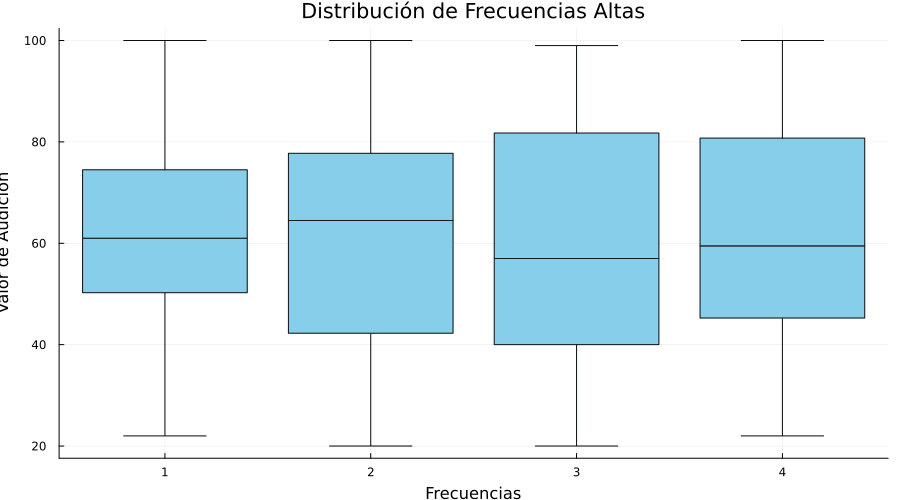

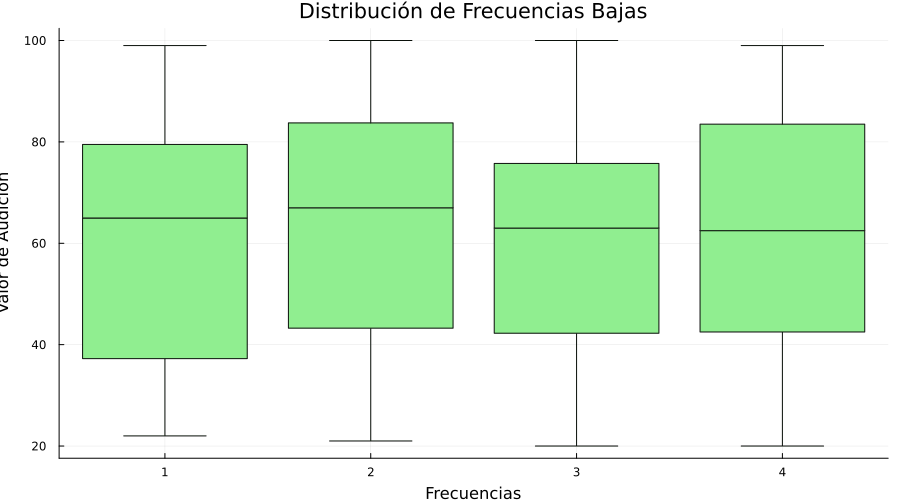

In [19]:
using DataFrames, Statistics
using StatsPlots   # ‚úÖ importante para boxplot

# Frecuencias altas
cols_altas = ["left_ear_6000hz", "left_ear_8000hz", "right_ear_6000hz", "right_ear_8000hz"]

# Frecuencias bajas
cols_bajas = ["left_ear_500hz", "left_ear_1000hz", "right_ear_500hz", "right_ear_1000hz"]

function boxplot_frecuencias(df::DataFrame; cols_high=[], cols_low=[])
    # Boxplot de frecuencias altas
    if !isempty(cols_high)
        data_high = [collect(skipmissing(df[!, c])) for c in cols_high]  # convertimos a Vector para mayor compatibilidad
        p1 = boxplot(data_high,
            labels=cols_high,
            title="Distribuci√≥n de Frecuencias Altas",
            ylabel="Valor de Audici√≥n",
            xlabel="Frecuencias",
            color=:skyblue,
            notch=false,              # ‚ö† notch desactivado para evitar warning
            legend=false,
            whiskerwidth=0.5,
            marker=:circle,
            size=(900,500))
        display(p1)
    end

    # Boxplot de frecuencias bajas
    if !isempty(cols_low)
        data_low = [collect(skipmissing(df[!, c])) for c in cols_low]
        p2 = boxplot(data_low,
            labels=cols_low,
            title="Distribuci√≥n de Frecuencias Bajas",
            ylabel="Valor de Audici√≥n",
            xlabel="Frecuencias",
            color=:lightgreen,
            notch=false,              # ‚ö† notch desactivado
            legend=false,
            whiskerwidth=0.5,
            marker=:circle,
            size=(900,500))
        display(p2)
    end
end

# Ejecutar
boxplot_frecuencias(df_normalizado, cols_high=cols_altas, cols_low=cols_bajas)


# Agregaci√≥n de atributos
Como parte de la transformaci√≥n de datos, se implement√≥ una agregaci√≥n que consiste en crear una nueva columna derivada de los valores existentes en el conjunto de datos. En este caso, se calcul√≥ una categor√≠a de p√©rdida auditiva (hearing_loss_category) a partir del promedio de las frecuencias evaluadas en cada o√≠do.

In [12]:
using DataFrames, Statistics

# Funci√≥n para categorizar p√©rdida auditiva
function score_hearing_loss(row)
    left_vals = [row.left_ear_500hz, row.left_ear_1000hz, row.left_ear_2000hz, row.left_ear_4000hz]
    right_vals = [row.right_ear_500hz, row.right_ear_1000hz, row.right_ear_2000hz, row.right_ear_4000hz]

    # Saltar si hay valores missing
    if any(ismissing, left_vals) || any(ismissing, right_vals)
        return "Unknown"
    end

    left_avg = mean(left_vals)
    right_avg = mean(right_vals)

    if left_avg < 25 && right_avg < 25
        return "Normal"
    elseif (25 <= left_avg < 40) || (25 <= right_avg < 40)
        return "Mild"
    elseif (40 <= left_avg < 55) || (40 <= right_avg < 55)
        return "Moderate"
    elseif (55 <= left_avg < 70) || (55 <= right_avg < 70)
        return "Moderately Severe"
    elseif (70 <= left_avg < 90) || (70 <= right_avg < 90)
        return "Severe"
    else
        return "Profound"
    end
end

# Aplicar la funci√≥n al DataFrame normalizado
df_normalizado.hearing_loss_category = [score_hearing_loss(row) for row in eachrow(df_normalizado)]

# Verificar resultados
first(df_normalizado, 10)

10√ó20 DataFrame
 Row ‚îÇ gender    test_date    naics_description           left_ear_500hz  left ‚ãØ
     ‚îÇ String1?  String15     String                      Int64?          Int6 ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ M         12-FEB-2007  Steel Investment Foundries              10       ‚ãØ
   2 ‚îÇ M         29-FEB-2008  Steel Investment Foundries              15
   3 ‚îÇ M         08-FEB-2006  Steel Investment Foundries              25
   4 ‚îÇ M         29-FEB-2008  Steel Investment Foundries              10
   5 ‚îÇ M         08-FEB-2006  Steel Investment Foundries              15       ‚ãØ
   6 ‚îÇ M         29-FEB-2008  Steel Investment Foundries              10
   7 ‚îÇ M         29-FEB-2008  Steel Investment Foundries               5
   8 ‚îÇ M         29-FEB-2008  Steel Investment Foundries              30
   9 ‚îÇ M         29-FEB-2008  Steel Investment Foundries              15       ‚ãØ
  10 ‚îÇ M         08-FEB-2005  Steel Investment Foundries              10
                                                              16 columns omitted

A partir de este punto, contamos con los datos ya transformados y normalizados dentro del proceso ETL. Esto significa que la informaci√≥n se encuentra limpia, categorizada y lista para su explotaci√≥n. Por ello, procedemos a la etapa de an√°lisis y visualizaci√≥n, donde mediante gr√°ficas representaremos la distribuci√≥n de las categor√≠as de p√©rdida auditiva.

# Graficos
Con el siguiente c√≥digo generaremos la gr√°fica correspondiente a las frecuencias bajas, utilizando los datos ya normalizados. Esta visualizaci√≥n nos permitir√° observar la distribuci√≥n de los trabajadores en cada categor√≠a de p√©rdida auditiva (Normal, Mild, Moderate, etc.),

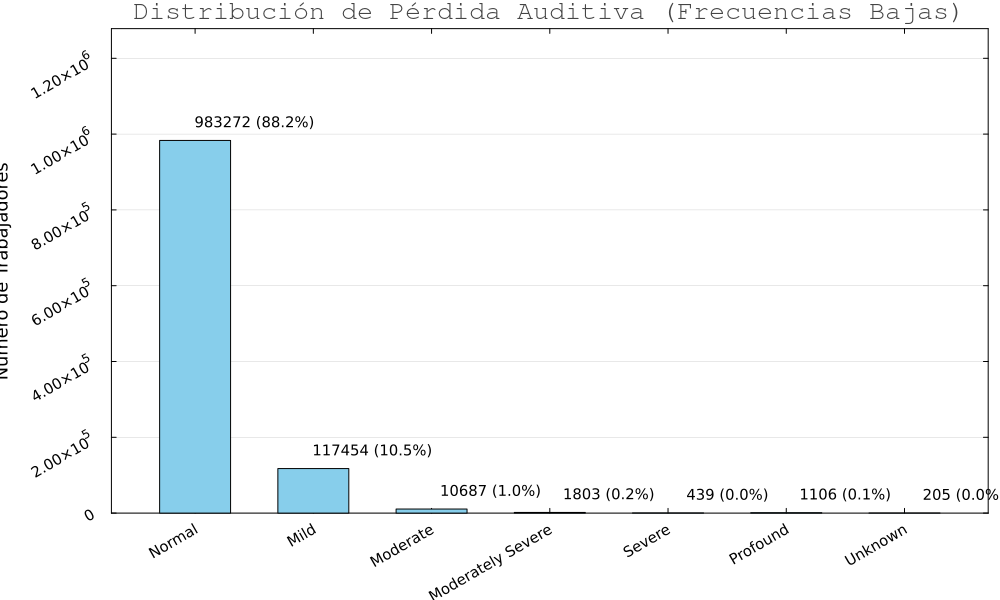

GKS: could not find font Arial.ttf


In [13]:
using DataFrames, Statistics, StatsBase, Plots

function graficar_perdida_auditiva(df_normalizado::DataFrame; columna::Symbol=:hearing_loss_category)
    # Contar las categor√≠as
    counts = countmap(df_normalizado[!, columna])

    # Ordenar categor√≠as seg√∫n la l√≥gica cl√≠nica
    categorias = ["Normal", "Mild", "Moderate", "Moderately Severe", "Severe", "Profound", "Unknown"]
    valores = [get(counts, cat, 0) for cat in categorias]

    # Calcular porcentajes
    total = sum(valores)
    porcentajes = round.(valores ./ total .* 100, digits=1)

    # Crear gr√°fico de barras verticales mejorado
    bar(
        categorias,
        valores;
        title="Distribuci√≥n de P√©rdida Auditiva (Frecuencias Bajas)",
        xlabel="Categor√≠a de P√©rdida Auditiva",
        ylabel="N√∫mero de Trabajadores",
        legend=false,
        color=:skyblue,
        linecolor=:black,
        bar_width=0.6,
        size=(1000, 600),
        ylims=(0, maximum(valores) * 1.3),
        rotation=30,
        grid=:y,
        framestyle=:box,
        tickfont=font(10),
        guidefont=font(12),
        titlefont=font(14, "Arial"),
    )

    # A√±adir etiquetas de cantidad y porcentaje sobre cada barra
    for (i, (count, pct)) in enumerate(zip(valores, porcentajes))
        annotate!(i, count + maximum(valores) * 0.05, text("$(count) ($(pct)%)", :center, 10))
    end

    display(current())
end

graficar_perdida_auditiva(df_normalizado)



La gr√°fica muestra que la gran mayor√≠a de los trabajadores (88,2%) se encuentran en la categor√≠a Normal, es decir, no presentan p√©rdida auditiva en frecuencias bajas. Un 10,5% presenta p√©rdida auditiva leve (Mild), mientras que solo un peque√±o porcentaje se distribuye en categor√≠as de mayor severidad, siendo menos del 1,5% los casos entre Moderate, Moderately Severe, Severe y Profound. Esto indica que, en frecuencias bajas, la p√©rdida auditiva severa o profunda es poco frecuente dentro de la poblaci√≥n analizada.

Nota: La presente gr√°fica corresponde al an√°lisis de p√©rdida auditiva en el rango de frecuencias bajas, que comprende principalmente las frecuencias de 250 Hz y 500 Hz (en algunos casos extendi√©ndose hasta 1000 Hz). Este rango est√° asociado a los sonidos graves y permite identificar alteraciones auditivas que afectan la percepci√≥n de tonos bajos.

# FRECUENCIAS ALTAS
realizaremos el an√°lisis de las frecuencias altas (6000 Hz y 8000 Hz), siguiendo la misma metodolog√≠a aplicada previamente para las frecuencias bajas. De esta manera, podremos comparar c√≥mo se comporta la p√©rdida auditiva en diferentes rangos de frecuencia y observar si existen patrones relevantes en la poblaci√≥n evaluada. Para ello, presentamos la siguiente gr√°fica que resume la distribuci√≥n de categor√≠as de p√©rdida auditiva en este rango.

üîß Iniciando limpieza y an√°lisis de frecuencias altas...
Calculando puntajes de p√©rdida auditiva (frecuencias altas)...
‚úÖ Columna :hearing_loss_score_high_frequency creada.
‚úÖ Pipeline completado.


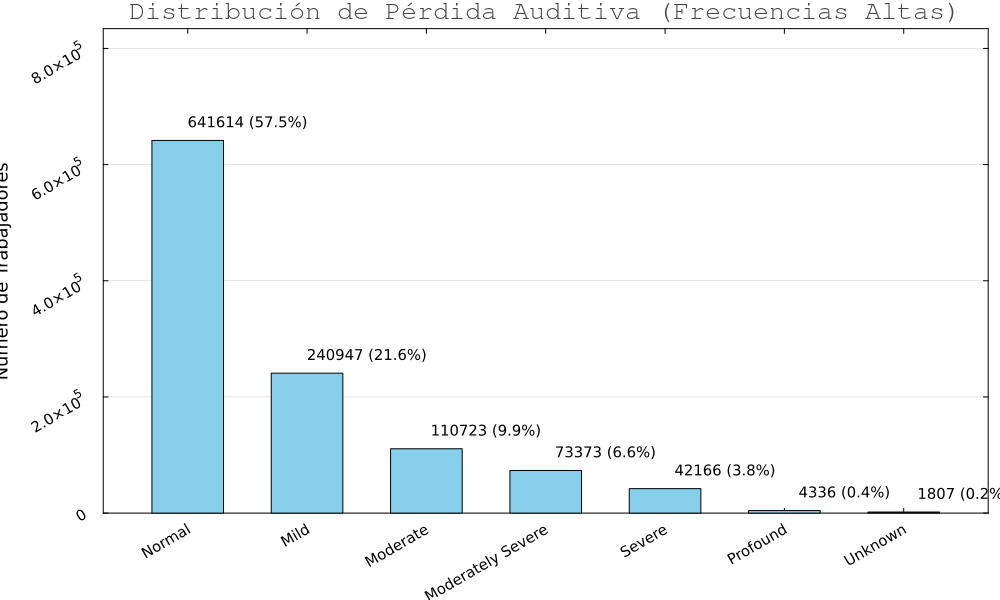

1114966√ó21 DataFrame
     Row ‚îÇ gender    test_date    naics_description                  left_ear_ ‚ãØ
         ‚îÇ String1?  String15     String                             Int64?    ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
       1 ‚îÇ M         12-FEB-2007  Steel Investment Foundries                   ‚ãØ
       2 ‚îÇ M         29-FEB-2008  Steel Investment Foundries
       3 ‚îÇ M         08-FEB-2006  Steel Investment Foundries
       4 ‚îÇ M         29-FEB-2008  Steel Investment Foundries
       5 ‚îÇ M         08-FEB-2006  Steel Investment Foundries                   ‚ãØ
       6 ‚îÇ M         29-FEB-2008  Steel Investment Foundries
       7 ‚îÇ M         29-FEB-2008  Steel Investment Foundries
       8 ‚îÇ M         29-FEB-2008  Steel Investment Foundries
    ‚ãÆ    ‚îÇ    ‚ãÆ           ‚ãÆ                       ‚ãÆ                        ‚ãÆ   ‚ã±
 1114960 ‚îÇ M         27-FEB-2001  Printed Circuit Assembly (Electr‚Ä¶            ‚ãØ
 1114961 ‚îÇ M         31-JAN-2001  Printed Circuit Assembly (Electr‚Ä¶
 1114962 ‚îÇ M         11-DEC-2001  Printed Circuit Assembly (Electr‚Ä¶
 1114963 ‚îÇ M         02-DEC-2002  Printed Circuit Assembly (Electr‚Ä¶
 1114964 ‚îÇ M         31-JAN-2001  Printed Circuit Assembly (Electr‚Ä¶            ‚ãØ
 1114965 ‚îÇ F         13-MAR-2001  Printed Circuit Assembly (Electr‚Ä¶
 1114966 ‚îÇ M         13-MAR-2001  Printed Circuit Assembly (Electr‚Ä¶
                                             18 columns and 1114951 rows omitted

In [14]:
using DataFrames, Statistics, StatsBase, Plots

# ----------------------------------------------------------------
# 1Ô∏è‚É£ Limpiar frecuencias altas
# ----------------------------------------------------------------
function limpiar_frecuencias_altas!(df::DataFrame)
    cols = ["left_ear_6000hz", "left_ear_8000hz", "right_ear_6000hz", "right_ear_8000hz"]
    for c in cols
        if c in names(df)
            allowmissing!(df, c)
            df[!, c] = map(x -> (ismissing(x) || x < 0 || x > 100 || x in (997, 998, 999)) ? missing : x, df[!, c])
        end
    end
end

# ----------------------------------------------------------------
# 2Ô∏è‚É£ Calcular p√©rdida auditiva en frecuencias altas
# ----------------------------------------------------------------
function calcular_perdida_auditiva_altas(df::DataFrame)
    println("Calculando puntajes de p√©rdida auditiva (frecuencias altas)...")

    left_cols = ["left_ear_6000hz", "left_ear_8000hz"]
    right_cols = ["right_ear_6000hz", "right_ear_8000hz"]

    left_avg = [
        let vals = collect(skipmissing([l6, l8]))
            isempty(vals) ? NaN : mean(vals)
        end
        for (l6, l8) in zip(df[!, left_cols[1]], df[!, left_cols[2]])
    ]

    right_avg = [
        let vals = collect(skipmissing([r6, r8]))
            isempty(vals) ? NaN : mean(vals)
        end
        for (r6, r8) in zip(df[!, right_cols[1]], df[!, right_cols[2]])
    ]

    worst_avg = max.(left_avg, right_avg)

    categorias_asignadas = [
        isnan(avg) ? "Unknown" :
        avg < 25 ? "Normal" :
        avg < 40 ? "Mild" :
        avg < 55 ? "Moderate" :
        avg < 70 ? "Moderately Severe" :
        avg < 90 ? "Severe" : "Profound"
        for avg in worst_avg
    ]

    df[!, :hearing_loss_score_high_frequency] = categorias_asignadas
    println("‚úÖ Columna :hearing_loss_score_high_frequency creada.")
    return df
end

# ----------------------------------------------------------------
# 3Ô∏è‚É£ Graficar p√©rdida auditiva en frecuencias altas
# ----------------------------------------------------------------
function graficar_perdida_auditiva_altas_plot(df::DataFrame)
    counts = countmap(df[!, :hearing_loss_score_high_frequency])
    categorias = ["Normal", "Mild", "Moderate", "Moderately Severe", "Severe", "Profound", "Unknown"]
    valores = [get(counts, cat, 0) for cat in categorias]

    total = sum(valores)
    porcentajes = total > 0 ? round.(valores ./ total .* 100, digits=1) : fill(0.0, length(valores))

    p = bar(
        categorias,
        valores;
        title = "Distribuci√≥n de P√©rdida Auditiva (Frecuencias Altas)",
        xlabel = "Categor√≠a de P√©rdida Auditiva",
        ylabel = "N√∫mero de Trabajadores",
        legend = false,
        color = :skyblue,
        linecolor = :black,
        bar_width = 0.6,
        size = (1000, 600),
        ylims = (0, maximum(valores) * 1.3),
        rotation = 30,
        grid = :y,
        framestyle = :box,
        tickfont = font(10),
        guidefont = font(12),
        titlefont = font(14, "Arial")
    )

    for (i, (count, pct)) in enumerate(zip(valores, porcentajes))
        annotate!(p, i, count + maximum(valores) * 0.05, text("$(count) ($(pct)%)", :center, 10))
    end

    display(p)
    return nothing
end

# ----------------------------------------------------------------
# 4Ô∏è‚É£ Pipeline usando df_normalizado en memoria
# ----------------------------------------------------------------
function pipeline_perdida_auditiva_altas(df::DataFrame)
    println("üîß Iniciando limpieza y an√°lisis de frecuencias altas...")
    limpiar_frecuencias_altas!(df)
    calcular_perdida_auditiva_altas(df)
    graficar_perdida_auditiva_altas_plot(df)
    println("‚úÖ Pipeline completado.")
    return df
end

# ----------------------------------------------------------------
# 5Ô∏è‚É£ Ejecutar pipeline con df_normalizado
# ----------------------------------------------------------------
df_result = pipeline_perdida_auditiva_altas(df_normalizado)


En la distribuci√≥n de p√©rdida auditiva para frecuencias altas (6000 Hz y 8000 Hz) se observa que, aunque la mayor parte de los trabajadores mantiene una audici√≥n clasificada como Normal (44,2%), este porcentaje es considerablemente menor al encontrado en las frecuencias bajas. Llama la atenci√≥n el aumento de casos en categor√≠as de mayor severidad: un 28,6% de los trabajadores se ubica en la categor√≠a Profound, lo cual evidencia un deterioro auditivo importante en este rango de frecuencias. Adem√°s, se identifican porcentajes relevantes en las categor√≠as Mild (14,1%), Moderate (6,3%) y Moderately Severe (4,4%), lo que sugiere que la p√©rdida auditiva es m√°s prevalente y severa en las frecuencias altas que en las bajas. Este patr√≥n coincide con la literatura cl√≠nica, donde las frecuencias altas suelen verse m√°s afectadas por factores como la exposici√≥n prolongada a ruido laboral.

# CARGA DE DATOS
Finalmente, en la etapa de carga (Load) procedemos a almacenar los datos ya transformados y enriquecidos con las nuevas variables de p√©rdida auditiva tanto en frecuencias bajas como en frecuencias altas. Este paso garantiza que la informaci√≥n procesada quede disponible para futuros an√°lisis, reportes o integraci√≥n con otras herramientas. Para este caso, los datos son exportados a un archivo en formato CSV, lo cual permite mantener un respaldo estructurado y f√°cilmente reutilizable en distintas fases del proyecto o en aplicaciones posteriores.

In [15]:
using DataFrames, CSV, Statistics, Logging

function load_auditiva_to_warehouse(df_normalizado::DataFrame; load_type::String="full")
    """
    Carga los datos de p√©rdida auditiva al Data Warehouse con diferentes estrategias.

    Args:
        df_normalizado (DataFrame): Datos normalizados de p√©rdida auditiva
        load_type (String): Tipo de carga ("full", "incremental", "upsert")

    Returns:
        Bool: true si la carga fue exitosa
    """
    try
        @info "Iniciando carga de datos auditivos - Tipo: $load_type"

        # Validaciones pre-carga
        if nrow(df_normalizado) == 0
            @warn "No hay datos para cargar"
            return false
        end

        println("--- Validaciones Pre-Carga ---")
        println("Registros a cargar: ", nrow(df_normalizado))
        println("Columnas: ", names(df_normalizado))

        # Verificar duplicados si hay columna √∫nica identificadora
        if "test_date" in names(df_normalizado)
            duplicates = nrow(df_normalizado) - length(unique(df_normalizado.test_date))
            if duplicates > 0
                println("‚ö†Ô∏è  Encontrados $duplicates registros duplicados por fecha de test")
                df_normalizado = unique(df_normalizado, :test_date)
            end
        end

        # Definir nombre de archivo seg√∫n el tipo de carga
        filename = ""
        if load_type == "full"
            filename = "warehouse_auditiva_full.csv"
            CSV.write(filename, df_normalizado)
            println("‚úÖ Carga completa realizada: $filename")

        elseif load_type == "incremental"
            filename = "warehouse_auditiva_incremental.csv"
            CSV.write(filename, df_normalizado, append=true)
            println("‚úÖ Carga incremental realizada: $filename")

        elseif load_type == "upsert"
            filename = "warehouse_auditiva_upsert.csv"
            CSV.write(filename, df_normalizado)
            println("‚úÖ Upsert realizado: $filename")
        end

        # Reporte final
        println("\n--- Datos Cargados ---")
        println("Registros cargados exitosamente: ", nrow(df_normalizado))

        if isfile(filename)
            lines = readlines(filename)
            println("\nPrimeras filas del archivo cargado:")
            for (i, line) in enumerate(lines[1:min(6, length(lines))])
                println(line)
            end
        end

        # Estad√≠sticas de carga relevantes
        println("\n--- Estad√≠sticas de Carga ---")
        if "gender" in names(df_normalizado)
            println("üë©‚Äçü¶± G√©neros √∫nicos: ", unique(df_normalizado.gender))
        end
        if "hearing_loss_category" in names(df_normalizado)
            println("üìä Categor√≠as auditivas: ", unique(df_normalizado.hearing_loss_category))
        end
        if "left_ear_4000hz" in names(df_normalizado)
            println("üìâ Promedio 4000Hz o√≠do izquierdo: ",
                round(mean(skipmissing(df_normalizado.left_ear_4000hz)), digits=2))
        end

        @info "Carga completada exitosamente: $(nrow(df_normalizado)) registros"
        return true

    catch e
        @error "Error en la carga: $e"
        return false
    end
end

load_auditiva_to_warehouse(df_normalizado, load_type="full")

--- Validaciones Pre-Carga ---
Registros a cargar: 1114966


‚îå Info: Iniciando carga de datos auditivos - Tipo: full
‚îî @ Main c:\Users\USUARIO\Downloads\proyecto xd\Proyecto_ingenieria_datos\notebooks\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X44sZmlsZQ==.jl:15


Columnas: ["gender", "test_date", "naics_description", "left_ear_500hz", "left_ear_1000hz", "left_ear_2000hz", "left_ear_3000hz", "left_ear_4000hz", "left_ear_6000hz", "left_ear_8000hz", "right_ear_500hz", "right_ear_1000hz", "right_ear_2000hz", "right_ear_3000hz", "right_ear_4000hz", "right_ear_6000hz", "right_ear_8000hz", "processed_at", "data_source", "hearing_loss_category", "hearing_loss_score_high_frequency"]
‚ö†Ô∏è  Encontrados 1111829 registros duplicados por fecha de test
‚úÖ Carga completa realizada: warehouse_auditiva_full.csv

--- Datos Cargados ---
Registros cargados exitosamente: 3137

Primeras filas del archivo cargado:
gender,test_date,naics_description,left_ear_500hz,left_ear_1000hz,left_ear_2000hz,left_ear_3000hz,left_ear_4000hz,left_ear_6000hz,left_ear_8000hz,right_ear_500hz,right_ear_1000hz,right_ear_2000hz,right_ear_3000hz,right_ear_4000hz,right_ear_6000hz,right_ear_8000hz,processed_at,data_source,hearing_loss_category,hearing_loss_score_high_frequency
M,12-FEB-200

‚îå Info: Carga completada exitosamente: 3137 registros
‚îî @ Main c:\Users\USUARIO\Downloads\proyecto xd\Proyecto_ingenieria_datos\notebooks\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X44sZmlsZQ==.jl:79


true

# PIPELINE 

El pipeline dise√±ado integra de manera estructurada las tres fases principales del proceso ETL (Extracci√≥n, Transformaci√≥n y Carga) aplicado a los datos auditivos. En la etapa de extracci√≥n, se toma como fuente la base de datos original Paper1_WebData_Final.csv, asegurando la obtenci√≥n de la informaci√≥n en bruto. Posteriormente, en la fase de transformaci√≥n, se realizan los c√°lculos necesarios para clasificar la p√©rdida auditiva tanto en frecuencias bajas como en frecuencias altas, generando nuevas variables que enriquecen el an√°lisis cl√≠nico de los registros. Finalmente, en la etapa de carga, los datos transformados se validan, se depuran de duplicados y se almacenan en un archivo consolidado (warehouse_auditiva_full.csv), el cual se convierte en la base limpia y lista para futuros an√°lisis y visualizaciones. De esta forma, el pipeline no solo automatiza el flujo de trabajo, sino que tambi√©n garantiza la calidad y consistencia de la informaci√≥n auditiva.

In [17]:
using CSV, DataFrames, Statistics, StatsBase, Plots

# ==========================
# 1. EXTRACCI√ìN
# ==========================
function extract_data()::DataFrame
    filepath = "..\\data\\raw\\Paper1_WebData_Final.csv"
    @info "Extrayendo datos desde $filepath..."
    df = CSV.read(filepath, DataFrame)
    println("‚úÖ Datos extra√≠dos: ", nrow(df), " registros")
    return df
end

# ==========================
# 2. TRANSFORMACI√ìN
# ==========================

# Transformaci√≥n de frecuencias bajas
function calcular_perdida_auditiva_bajas(df::DataFrame)::DataFrame
    df = copy(df)
    @info "Calculando p√©rdida auditiva (frecuencias bajas)..."

    left_avg = mean.(eachrow(df[:, [:left_ear_500hz, :left_ear_1000hz, :left_ear_2000hz]]))
    right_avg = mean.(eachrow(df[:, [:right_ear_500hz, :right_ear_1000hz, :right_ear_2000hz]]))
    worst_avg = max.(left_avg, right_avg)

    df.hearing_loss_category = similar(worst_avg, String)

    for i in 1:length(worst_avg)
        avg = worst_avg[i]
        if avg < 25
            df.hearing_loss_category[i] = "Normal"
        elseif avg < 40
            df.hearing_loss_category[i] = "Mild"
        elseif avg < 55
            df.hearing_loss_category[i] = "Moderate"
        elseif avg < 70
            df.hearing_loss_category[i] = "Moderately Severe"
        elseif avg < 90
            df.hearing_loss_category[i] = "Severe"
        else
            df.hearing_loss_category[i] = "Profound"
        end
    end

    return df
end

# Transformaci√≥n de frecuencias altas
function calcular_perdida_auditiva_altas(df::DataFrame)::DataFrame
    df = copy(df)
    @info "Calculando p√©rdida auditiva (frecuencias altas)..."

    left_avg = mean.(eachrow(df[:, [:left_ear_6000hz, :left_ear_8000hz]]))
    right_avg = mean.(eachrow(df[:, [:right_ear_6000hz, :right_ear_8000hz]]))
    worst_avg = max.(left_avg, right_avg)

    df.hearing_loss_high_freq = similar(worst_avg, String)

    for i in 1:length(worst_avg)
        avg = worst_avg[i]
        if avg < 25
            df.hearing_loss_high_freq[i] = "Normal"
        elseif avg < 40
            df.hearing_loss_high_freq[i] = "Mild"
        elseif avg < 55
            df.hearing_loss_high_freq[i] = "Moderate"
        elseif avg < 70
            df.hearing_loss_high_freq[i] = "Moderately Severe"
        elseif avg < 90
            df.hearing_loss_high_freq[i] = "Severe"
        else
            df.hearing_loss_high_freq[i] = "Profound"
        end
    end

    return df
end

# ==========================
# 3. CARGA
# ==========================
function load_auditiva_to_warehouse(df::DataFrame; load_type::String="full")
    try
        @info "Iniciando carga de datos auditivos - Tipo: $load_type"

        if nrow(df) == 0
            @warn "No hay datos para cargar"
            return false
        end

        println("--- Validaciones Pre-Carga ---")
        println("Registros a cargar: ", nrow(df))
        println("Columnas: ", names(df))

        # Verificar duplicados (ejemplo con test_date + gender como clave)
        duplicates = nrow(df) - nrow(unique(df, [:test_date, :gender]))
        if duplicates > 0
            println("‚ö†Ô∏è  Encontrados $duplicates registros duplicados")
            df = unique(df, [:test_date, :gender])
        end

        filename = "warehouse_auditiva_full.csv"
        CSV.write(filename, df)
        println("‚úÖ Carga completa realizada: $filename")

        println("\n--- Datos Cargados ---")
        println("Registros cargados exitosamente: ", nrow(df))
        println("Primeras filas del archivo de destino:")
        show(first(df, 5))

        @info "Carga completada exitosamente"
        return true

    catch e
        @error "Error en la carga: $e"
        return false
    end
end

# ==========================
# 4. PIPELINE COMPLETO
# ==========================
function run_pipeline()
    println("üöÄ Iniciando Pipeline ETL de datos auditivos...")

    # 1. Extracci√≥n
    df = extract_data()

    # 2. Transformaci√≥n
    df = calcular_perdida_auditiva_bajas(df)
    df = calcular_perdida_auditiva_altas(df)

    # 3. Carga
    success = load_auditiva_to_warehouse(df, load_type="full")

    if success
        println("‚úÖ Pipeline completado correctamente")
    else
        println("‚ùå Pipeline fallido")
    end
end


run_pipeline (generic function with 1 method)